In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

In [2]:
#g=nx.watts_strogatz_graph(240000,20,0.1,seed=42) 
#g=nx.barabasi_albert_graph(240000,6,seed=42)
g=nx.watts_strogatz_graph(240000,20,1,seed=42) #random graph 
model = ep.SIRModel(g,seed=42)

In [3]:
%%time
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.007) #感染率
cfg.add_model_parameter('gamma', 1/14) #回復率(2週間)
cfg.add_model_parameter("fraction_infected", 10/240000) #初期感染率
model.set_initial_status(cfg)

S_num=[]
I_num=[]
R_num=[]
for i in range(1000):
    tmp_params=model.iteration()
    #iterations =model.iteration_bunch(1)
    #trends = model.build_trends(iterations)
    S_num.append(tmp_params["node_count"][0])
    I_num.append(tmp_params["node_count"][1])
    R_num.append(tmp_params["node_count"][2])
    
    if tmp_params["node_count"][1]+tmp_params["node_count"][2]>5000:
        break
    if i%10==0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
CPU times: user 22.2 s, sys: 632 ms, total: 22.8 s
Wall time: 24.6 s


In [4]:
tmp_params["node_count"]

{0: 234779, 1: 2351, 2: 2870}

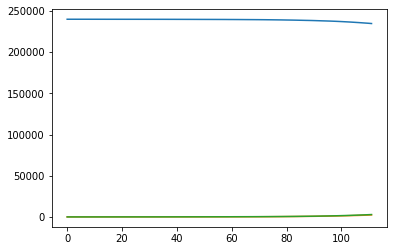

In [5]:
plt.plot(S_num)
plt.plot(I_num)
plt.plot(R_num)

In [6]:
# 感染者および治癒・死亡者のノードリスト作成
inected=[]
for i in range(len(model.status)):
    if model.status[i]>0:
        inected.append(i)

In [7]:
# 感染者を起点として各ノードへの経路長を計算(最大探索経路長2)。
# 全感染者で実行後の最小値が各ノードから感染者への最小経路長となる。
d={}
for i in range(240000):
    d[i]=99

In [8]:
%%time
# 各ノードから感染者への最短経路長を集計
cnt=0
for i in inected:
    tmp=nx.single_source_shortest_path_length(g, i,cutoff=2) #カットオフ以下が帰る。
    for k, v in tmp.items():
        if d[k]>v:
            d[k]=v

CPU times: user 12.2 s, sys: 201 ms, total: 12.4 s
Wall time: 15.3 s


In [9]:
pd.Series(d.values()).value_counts()

2     156564
1      78096
0       5221
99       119
dtype: int64